In [16]:
import os
import sys
sys.path.append("C://Users//User//PycharmProjects//Musgrave_scripts//BenRich//common_funcs")
import cohpfuncs as cfunc
import jdftxfuncs as jfunc
import plotfuncs as pfunc
# import poscarclass as Poscar
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
data_dir = "E://perl//pscratch//beri9208//HydrideTest//AzizStruc//No_opt//"
elts = ["Pt", "Fe", "Ni", "Y", "Zn"]
biases = ["No_bias", "0.00V", "-0.50V", "-1.00V"]
def get_dir(elmt, bidx):
    return data_dir + elmt + "//" + biases[bidx] + "//"

In [31]:
test_dir = get_dir("Zn", 0)
data_prefix = "output."
proj, nStates, nBands, nProj, nOrbsPerAtom, wk, k_points, E = cfunc.parse_data(test_dir + data_prefix + "bandProjections",
                                                                               test_dir + data_prefix + "Gvectors",
                                                                               test_dir + data_prefix + "eigenvals")
T_juk, P_uvjk, e_jk = cfunc.prepare_small_funcs(proj, E, numba=True)
orbs_dict = cfunc.orbs_idx_dict(test_dir + "out", nOrbsPerAtom)
pCOHP_uv, pCOHP_uv_u, H_atomic_matrix = cfunc.prepare_large_funcs(e_jk,P_uvjk,nBands,nStates,wk,k_points)
dE = 0.01
Erange = np.arange(np.min(E) - (dE*10), np.max(E) + (dE*10), dE)
test_pCOHP = pfunc.ez_pCOHP_sum(orbs_dict["H #1"], orbs_dict["Zn #1"], Erange, np.min(Erange), np.max(Erange), dE, pCOHP_uv)

In [36]:
E

array([[-10.9077236 ,  -9.22479579,  -9.22334353, ...,  -6.27802085,
         -6.27437675,  -6.27392082],
       [-10.90772358,  -9.2247958 ,  -9.22334353, ...,  -6.28361337,
         -6.28252133,  -6.28110803],
       [-10.9077236 ,  -9.2247958 ,  -9.22334354, ...,  -6.2836132 ,
         -6.2825205 ,  -6.28111353],
       ...,
       [-10.90774699,  -9.22482351,  -9.22335843, ...,  -6.28340203,
         -6.28148703,  -6.2806524 ],
       [-10.90774697,  -9.2248235 ,  -9.22335843, ...,  -6.28470224,
         -6.28148642,  -6.28108086],
       [-10.90774696,  -9.22482351,  -9.22335843, ...,  -6.28016294,
         -6.27093289,  -6.26561545]])

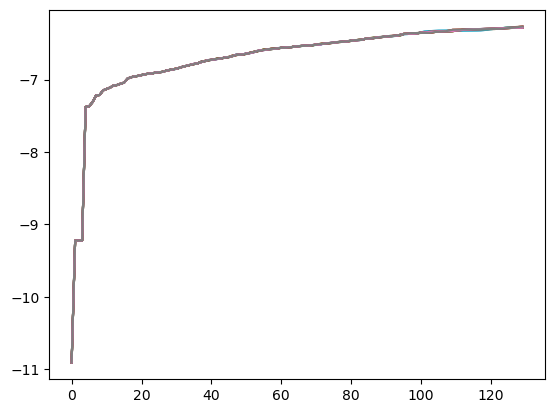

In [34]:
np.shape(E)
for i in range(18):
    plt.plot(np.arange(130), E[i])

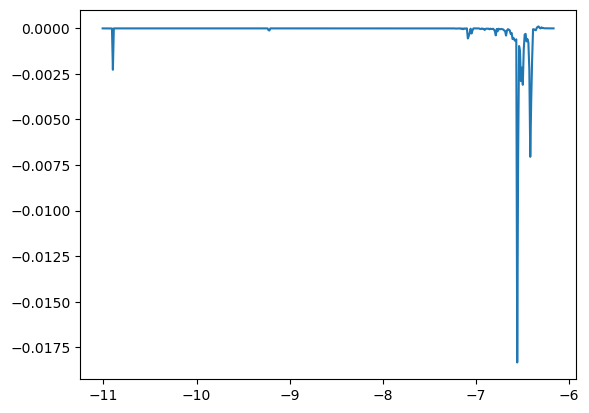

In [15]:
plt.plot(Erange, test_pCOHP)

In [29]:
hydride_pcohps = {}
for el in elts:
    start = time.time()
    hydride_pcohps[el] = {}
    for i, b in enumerate(biases):
        hydride_pcohps[el][b] = []
        active_dir = get_dir(el, i)
        data_prefix = "output."
        try:
            proj, nStates, nBands, nProj, nOrbsPerAtom, wk, k_points, E = cfunc.parse_data(active_dir + data_prefix + "bandProjections",
                                                                                           active_dir + data_prefix + "Gvectors",
                                                                                           active_dir + data_prefix + "eigenvals")
        except:
            hydride_pcohps[el][b].append(np.zeros(10))
            hydride_pcohps[el][b].append(np.zeros(10))
            hydride_pcohps[el][b].append(0)
            continue
        T_juk, P_uvjk, e_jk = cfunc.prepare_small_funcs(proj, E, numba=False)
        orbs_dict = cfunc.orbs_idx_dict(active_dir + "out", nOrbsPerAtom)
        pCOHP_uv, pCOHP_uv_u, H_atomic_matrix = cfunc.prepare_large_funcs(e_jk,P_uvjk,nBands,nStates,wk,k_points)
        dE = 0.01
        Erange = np.arange(np.min(E) - (dE*10), np.max(E) + (dE*10), dE)
        active_pCOHP = pfunc.ez_pCOHP_sum(orbs_dict["H #1"], orbs_dict[el + " #1"], Erange, np.min(Erange), np.max(Erange), dE, pCOHP_uv)
        hydride_pcohps[el][b].append(Erange)
        hydride_pcohps[el][b].append(active_pCOHP)
        S, R, mu = jfunc.get_vars(active_dir + "out")
        hydride_pcohps[el][b].append(mu)
    end = time.time()
    print(end - start)

6.672513246536255
6.638518333435059
4.919116497039795
6.325446605682373
6.532471418380737


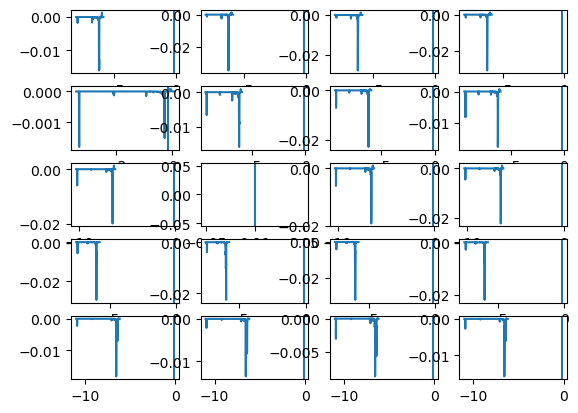

In [30]:
fig, axes = plt.subplots(len(elts), len(biases))
for i, e in enumerate(elts):
    for j, b in enumerate(biases):
        axes[i][j].plot(hydride_pcohps[e][b][0], hydride_pcohps[e][b][1])
        # axes[i][j].axvline(x=hydride_pcohps[e][b][2])

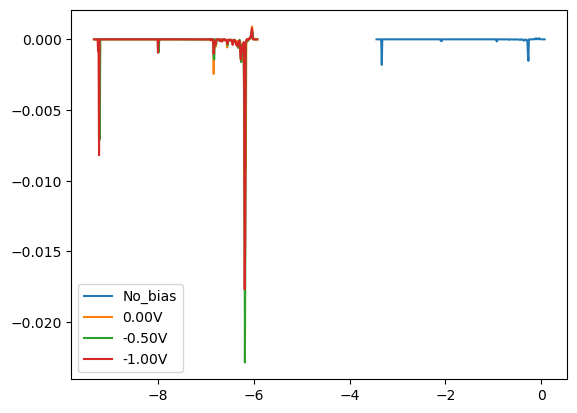

In [22]:
elmt = "Fe"
for bidx in range(len(biases)):
    plt.plot(hydride_pcohps[elmt][biases[bidx]][0],hydride_pcohps[elmt][biases[bidx]][1], label=biases[bidx])
plt.title=elmt
plt.legend()

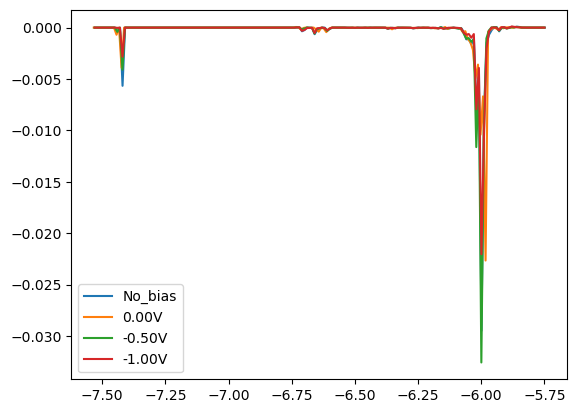

In [25]:
elmt = "Y"
for bidx in range(len(biases)):
    plt.plot(hydride_pcohps[elmt][biases[bidx]][0],hydride_pcohps[elmt][biases[bidx]][1], label=biases[bidx])
plt.title=elmt
plt.legend()
plt.show()

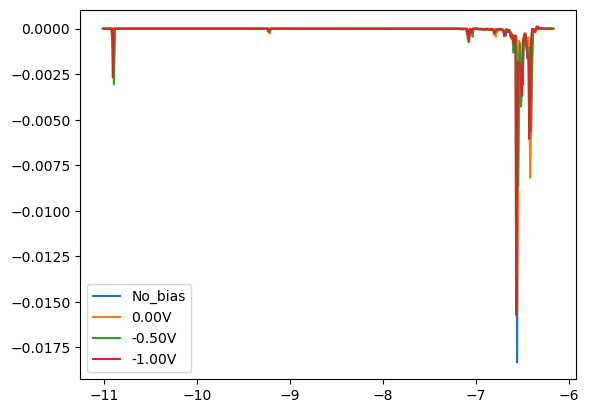

In [26]:
elmt = "Zn"
for bidx in range(len(biases)):
    plt.plot(hydride_pcohps[elmt][biases[bidx]][0],hydride_pcohps[elmt][biases[bidx]][1], label=biases[bidx])
plt.title=elmt
plt.legend()